In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from config_ import nameC_bulk,nameC_cellulose,named13C_bulk, named13C_cellulose, named15N

In [100]:
## cellulose

NAPO= pd.read_excel(r"C:\Users\selene.baez\Downloads\NAPO_preliminar\Results_isofys\specs - AndreaChavez-2025.07.xlsx")
NAPO_2006 = NAPO[NAPO["Meas batch"].str.contains("NAPO2006", na=False)]
NAPO_2006["year"] = 2006
NAPO_2025 = NAPO[NAPO["Meas batch"].str.contains("NAPO2025", na=False)]
NAPO_2025["year"] = 2025
NAPO_add = NAPO[NAPO["Sample ID"].isin(["p07-183", "p70-3650"])] #HELP Check p09-0122, p09-0140
NAPO_add["year"] = "search"

NAPO_cellulose = pd.concat([NAPO_2006,NAPO_2025,NAPO_add])
NAPO_cellulose = NAPO_cellulose.rename(columns = {"[C] in %":nameC_cellulose,"δ13C":named13C_cellulose	})
NAPO_cellulose[["Plot","TreeID"]] =NAPO_cellulose["Sample ID"].str.split("-",expand=True) #len 182
NAPO_cellulose["Sample Type"] = "pulverized"
NAPO_cellulose



C:\Users\selene.baez\AppData\Local\Temp\ipykernel_16904\4050599987.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAPO_2006["year"] = 2006
C:\Users\selene.baez\AppData\Local\Temp\ipykernel_16904\4050599987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAPO_2025["year"] = 2025
C:\Users\selene.baez\AppData\Local\Temp\ipykernel_16904\4050599987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Sample ID,[C]%,δ13C (‰ v.s.V-PDB),Meas batch,Comment,year,Plot,TreeID,Sample Type
95,p23-561,43.689971,-31.626469,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,2006,p23,561,pulverized
96,p29-763,48.003020,-32.797394,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,2006,p29,763,pulverized
97,p29-768,43.306540,-29.511927,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,2006,p29,768,pulverized
98,p29-777,44.474675,-29.353087,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,2006,p29,777,pulverized
99,p29-781,43.930235,-32.736204,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,2006,p29,781,pulverized
...,...,...,...,...,...,...,...,...,...
270,p60-8751,43.998552,-27.759220,AndreaChavez-HF2-NAPO2025-Conly,NaN,2025,p60,8751,pulverized
271,p28-8738,43.841439,-32.261144,AndreaChavez-HF2-NAPO2025-Conly,NaN,2025,p28,8738,pulverized
272,p60-8885,46.225205,-33.253234,AndreaChavez-HF2-NAPO2025-Conly,NaN,2025,p60,8885,pulverized
289,p70-3650,42.130000,-31.610000,AndreaChavez-HF2-NUMEX-Sfcellulose-Conly-202505,NaN,search,p70,3650,pulverized


In [101]:
#bulk HELP: añadir los años 
SEQ1= pd.read_excel("Andrea_bulk CN_2025.xlsx",sheet_name="SEQ1")
SEQ1 = SEQ1.iloc[7:] #deletes first 7 rows
SEQ1["year"] = 2006
SEQ2 = pd.read_excel("Andrea_bulk CN_2025.xlsx",sheet_name="SEQ2")
SEQ2 = SEQ2.iloc[56:73+1] #only napo
SEQ2["year"] = 2006
SEQ4 = pd.read_excel("Andrea_bulk CN_2025.xlsx",sheet_name="SEQ4")
SEQ4 = SEQ4.iloc[7:]
SEQ4["year"] = 2025
SEQ5 = pd.read_excel("Andrea_bulk CN_2025.xlsx",sheet_name="SEQ5")
SEQ5 = SEQ5.iloc[7:]
valores_excluir = ["p11-5785","p11-7887","QCA251592", "Sodiro-aa-0001", "Sodiro-aa-005", "Sodiro-aa-006", "Sodiro-vs-0003"]
df_filtrado = SEQ5[~SEQ5["certified values"].isin(valores_excluir)]
df_filtrado["year"] = 2025
SEQ7 = pd.read_excel("Andrea_bulk CN_2025.xlsx",sheet_name="SEQ7")
SEQ7 = SEQ7.iloc[51:]
SEQ7["year"] = 2025

bulk = pd.concat([SEQ1,SEQ2,SEQ4,df_filtrado,SEQ7])
bulk = bulk.rename(columns={"certified values":"sample-ID", "Unnamed: 2":"[N]",
                            "Unnamed: 4":nameC_bulk,"Unnamed: 6":named15N,
                            "Unnamed: 8":named13C_bulk})
bulk = bulk.iloc[1:]#delete first row

bulk[["Plot","TreeID","a"]] =bulk["sample-ID"].str.split("-",expand=True) #len 182
columns_drop = ["Unnamed: 0", "Unnamed: 3","Unnamed: 5","Unnamed: 7", "Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12"]
bulk = bulk.drop(columns=columns_drop)
bulk#.to_excel("test.xlsx")

C:\Users\selene.baez\AppData\Local\Temp\ipykernel_16904\3423392920.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["year"] = 2025


,sample-ID,[N],[C_b]%,δ15N (‰ v.s. V-PDB),bulk_δ13C (‰ v.s.V-PDB),year,Plot,TreeID,a
8,p20-472,0.033256,0.387719,1.26,-30.86,2006,p20,472,None
9,p20-474,0.03299,0.420128,2.23,-31.83,2006,p20,474,None
10,p20-478,0.024238,0.447923,1.78,-32.14,2006,p20,478,None
11,p20-485,0.025072,0.478168,-0.39,-32.55,2006,p20,485,None
12,p20-486,0.03605,0.403459,2.07,-31.74,2006,p20,486,None
...,...,...,...,...,...,...,...,...,...
55,p29-777,0.020353,0.465026,0.910612,-30.928973,2025,p29,777,None
56,p29-779,0.027024,0.456031,4.883287,-32.268307,2025,p29,779,None
57,p29-781,0.030355,0.443805,1.769842,-33.762179,2025,p29,781,None
58,p29-792,0.017992,0.385438,1.274521,-33.113117,2025,p29,792,None


In [102]:
### cellulose and bulk

merged = pd.merge(NAPO_cellulose,bulk, left_on="TreeID", right_on="TreeID", how="outer")
merged["Sample ID"] = merged["Sample ID"].combine_first(merged["TreeID"])#.to_excel("test.xlsx")

#drop undesired columns
merged["year"] = merged["year_x"].combine_first(merged["year_y"])
merged["Plot"] = merged["Plot_x"].combine_first(merged["Plot_y"])

merged = merged.drop(columns=["year_x", "year_y", "Plot_x", "Plot_y"])
merged#to_excel()

,Sample ID,[C]%,δ13C (‰ v.s.V-PDB),Meas batch,Comment,TreeID,Sample Type,sample-ID,[N],[C_b]%,δ15N (‰ v.s. V-PDB),bulk_δ13C (‰ v.s.V-PDB),a,year,Plot
0,p23-561,43.689971,-31.626469,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,561,pulverized,NaN,NaN,NaN,NaN,NaN,NaN,2006,p23
1,p29-763,48.003020,-32.797394,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,763,pulverized,p29-763,0.025796,0.458234,5.86382,-33.216143,NaN,2006,p29
2,p29-768,43.306540,-29.511927,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,768,pulverized,p29-768,0.022316,0.44832,2.00234,-32.206491,NaN,2006,p29
3,p29-777,44.474675,-29.353087,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,777,pulverized,p29-777,0.020353,0.465026,0.910612,-30.928973,NaN,2006,p29
4,p29-781,43.930235,-32.736204,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,781,pulverized,p29-781,0.030355,0.443805,1.769842,-33.762179,NaN,2006,p29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,565,NaN,NaN,NaN,NaN,565,NaN,p23-565,0.020259,0.453534,0.210098,-33.004256,None,2006.0,p23
187,578,NaN,NaN,NaN,NaN,578,NaN,p23-578,0.027313,0.424881,1.411476,-32.665238,None,2006.0,p23
188,3635,NaN,NaN,NaN,NaN,3635,NaN,p70-3635,0.02329,0.428641,p70-3635,NaN,None,2025.0,p70
189,566,NaN,NaN,NaN,NaN,566,NaN,p23-566,0.018864,0.445698,-0.595568,-32.391937,None,2025.0,p23


In [103]:
df = merged

# Crear columna oldTreeID solo para year 2006
df["oldTreeID"] = df["TreeID"].where(df["year"] == 2006)

# Crear columna newTreeID solo para year 2025
df["newTreeID"] = df["TreeID"].where(df["year"] == 2025)

df#.to_excel("test.xlsx") #HELP por el momento estamos bien. Ahora hay que ver cuales matchean entre old TreeID y newTreeID. Para eso necesito la base de datos.


,Sample ID,[C]%,δ13C (‰ v.s.V-PDB),Meas batch,Comment,TreeID,Sample Type,sample-ID,[N],[C_b]%,δ15N (‰ v.s. V-PDB),bulk_δ13C (‰ v.s.V-PDB),a,year,Plot,oldTreeID,newTreeID
0,p23-561,43.689971,-31.626469,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,561,pulverized,NaN,NaN,NaN,NaN,NaN,NaN,2006,p23,561,NaN
1,p29-763,48.003020,-32.797394,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,763,pulverized,p29-763,0.025796,0.458234,5.86382,-33.216143,NaN,2006,p29,763,NaN
2,p29-768,43.306540,-29.511927,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,768,pulverized,p29-768,0.022316,0.44832,2.00234,-32.206491,NaN,2006,p29,768,NaN
3,p29-777,44.474675,-29.353087,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,777,pulverized,p29-777,0.020353,0.465026,0.910612,-30.928973,NaN,2006,p29,777,NaN
4,p29-781,43.930235,-32.736204,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,781,pulverized,p29-781,0.030355,0.443805,1.769842,-33.762179,NaN,2006,p29,781,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,565,NaN,NaN,NaN,NaN,565,NaN,p23-565,0.020259,0.453534,0.210098,-33.004256,None,2006.0,p23,565,NaN
187,578,NaN,NaN,NaN,NaN,578,NaN,p23-578,0.027313,0.424881,1.411476,-32.665238,None,2006.0,p23,578,NaN
188,3635,NaN,NaN,NaN,NaN,3635,NaN,p70-3635,0.02329,0.428641,p70-3635,NaN,None,2025.0,p70,NaN,3635
189,566,NaN,NaN,NaN,NaN,566,NaN,p23-566,0.018864,0.445698,-0.595568,-32.391937,None,2025.0,p23,NaN,566


In [104]:
info_2025 = pd.read_excel(r"C:\Users\selene.baez\Downloads\NAPO_preliminar\pre_NAPO2026.xlsx") #will open el listado del 2025 with the data. 
info_2025 = info_2025[["#","Plot","TreeID_2025","genus","specie","Date ","Site"]]
info_2025["name"] = info_2025["genus"]+" " + info_2025["specie"]
info_2025["TreeID_2025"] = info_2025["TreeID_2025"].astype(str) #187

df_2025 = df[df["year"] == 2025]

merge_2025 = pd.merge(df_2025,info_2025,left_on="TreeID", right_on="TreeID_2025", how = "left")


info_2006 = pd.read_excel(r"C:\Users\selene.baez\Downloads\NAPO_preliminar\Results_isofys\samples2006_GuacamayosGalera.xlsx") #
info_2006 = info_2006.rename(columns = {"species (det 2008!)":"name","site":"Site"})
info_2006["TreeID"] = info_2006["TreeID"].astype(str)
df_2006 = df[df["year"]==2006]
merge_2006 = pd.merge(df_2006,info_2006,left_on="TreeID", right_on="TreeID", how = "left")

all_1 = pd.concat([merge_2006,merge_2025])
all_1#.to_excel("test.xlsx") #HELP: por el momento esta bien pero necesito hacer un listado de las que tienen problemas, y ver cuales me faltan procesar.

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\selene.baez\\Downloads\\NAPO_preliminar\\pre_NAPO2026.xlsx'

Resultas from 1st research 

In [ ]:
#Results form 1st research stay 

#cellulose
results_ISMR = pd.read_excel("Resultis_ISMR_10072024.xlsx", sheet_name = "seq 1") #only seq1 has Napo results
results_ISMR.head(3)
subset = results_ISMR[["number of samples","sample-ID","[C] m/m (%)","δ13C (‰ v.s. V-PDB)"]]
subset = subset.rename(columns = {"sample-ID":"TreeID","[C] m/m (%)":nameC_cellulose,"δ13C (‰ v.s. V-PDB)":named13C_cellulose})

## bulk
bulk = pd.read_excel("data overview.xlsx")
add = bulk[bulk["Sample"].isin([8023,56079])]
bulk = bulk[bulk["Meas batch"] == "CN_S1"]
bulk = pd.concat([bulk,add])
bulk = bulk.rename(columns = {"Sample":"TreeID","[C] m/m":nameC_bulk,"δ13C (‰ v.s. V-PDB)":named13C_bulk,"δ15N (‰ v.s. V-PDB)":named15N})


In [ ]:
merged_1 = pd.merge(bulk,subset, on= "TreeID", how="outer")
#merged_1.to_excel("test.xlsx")

C:\Users\selene.baez\AppData\Local\Temp\ipykernel_16904\1421381841.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merged_1 = pd.merge(bulk,subset, on= "TreeID", how="outer")


In [ ]:
all_samples = pd.read_excel("Samples_Andrea_Jurgen.xlsx")
all_samples.head(3)

data_unido = merged_1

df1 = data_unido.merge(all_samples,left_on="TreeID",right_on="treeID_new")
df1["year"]= 2023
df1["Sample Type"]= "pulverized"

df2 = data_unido.merge(all_samples,left_on="TreeID",right_on="treeID_old")
df2["year"]= 2023
df2["Sample Type"]= "pulverized"

df3 = data_unido.merge(all_samples,left_on="TreeID",right_on="herbarium specimen")
df3["Sample Type"]= "herbarium" #okay

df4 = data_unido.merge(all_samples,left_on="TreeID",right_on="leaf_sample_ID_2011")
df4["year"]= 2011
df4["Sample Type"]= "pulverized" #okay


In [ ]:
all = pd.concat([df1,df2,df3,df4])
all_1year = all#.drop_duplicates(subset=['number of samples']) #deletes duplicates problems between new tree ID and old tree ID
#.to_excel("Isotope_results_OYC_GUA.xlsx")

test = pd.concat([all_1,all_1year])

test#.to_excel("test_todo.xlsx") #HELP

,Sample ID,[C]%,δ13C (‰ v.s.V-PDB),Meas batch,Comment,TreeID,Sample Type,sample-ID,[N],[C_b]%,...,ID_Andrea,treeID_new,treeID_old,Plot,pulverized,species,leaf_sample_ID_2011,herbarium specimen,collection year,herbaria
0,p23-561,43.689971,-31.626469,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,561,pulverized,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p29-763,48.003020,-32.797394,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,763,pulverized,p29-763,0.025796,0.458234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p29-768,43.306540,-29.511927,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,768,pulverized,p29-768,0.022316,0.44832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p29-777,44.474675,-29.353087,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,777,pulverized,p29-777,0.020353,0.465026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p29-781,43.930235,-32.736204,AndreaChavezHF2-NAPO2006-Conly-20250428,NaN,781,pulverized,p29-781,0.030355,0.443805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,NaN,45.027953,-25.530000,CN_S1,NaN,56124.0,pulverized,NaN,NaN,43.869441,...,13.0,8068.0,4244.0,83.0,NaN,Gynoxis acostae,56124.0,NaN,NaN,NaN
22,NaN,45.681624,-25.610000,CN_S1,NaN,56126.0,pulverized,NaN,NaN,45.165609,...,9.0,4248.0,4248.0,83.0,NaN,Polylepis pauta,56126.0,NaN,NaN,NaN
23,NaN,NaN,NaN,CN_S1,NaN,56127.0,pulverized,NaN,NaN,45.653858,...,11.0,4249.0,4249.0,83.0,NaN,Polylepis pauta,56127.0,NaN,NaN,NaN
24,NaN,45.087981,-24.880000,CN_S1,NaN,56128.0,pulverized,NaN,NaN,45.3998,...,12.0,4250.0,4250.0,83.0,NaN,Gynoxis acostae,56128.0,NaN,NaN,NaN


In [ ]:
all=test

all['Site'] = all['Site'].astype('category')
all['species'] = all["species"].astype('category')
all['collection year'] = all["collection year"].astype('category')


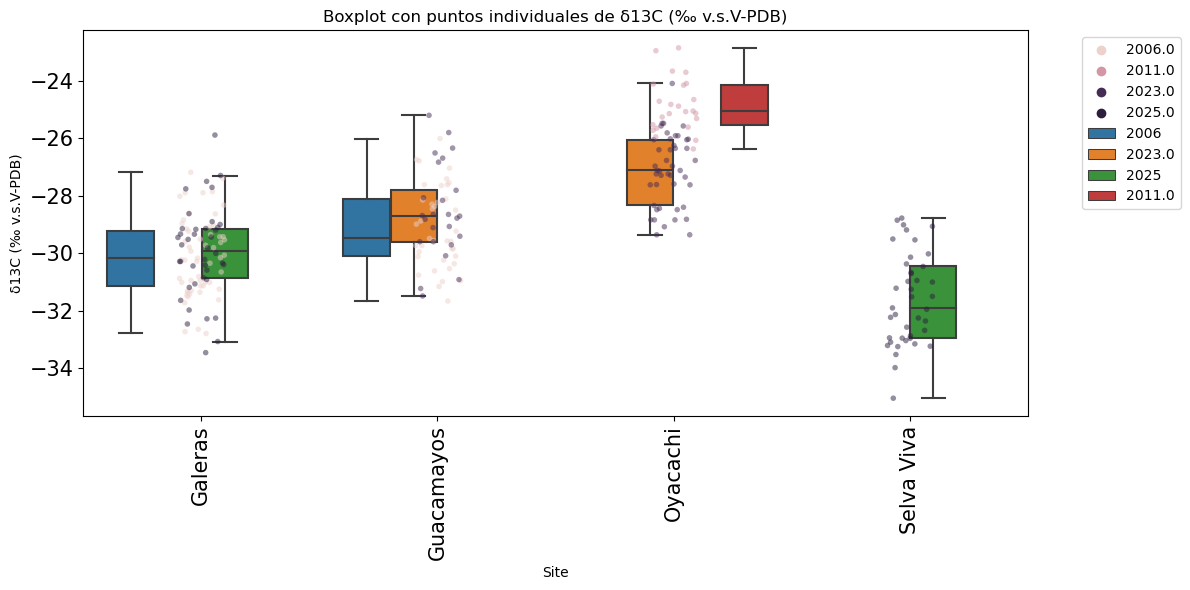

In [106]:
#boxplot = test.boxplot(column = [named13C_cellulose], by =["Site","year",],rot=90, fontsize=15)   
#ax = sns.boxplot(x="collection year",y='δ13C (‰ v.s. V-PDB)',data= oyacachi)

import seaborn as sns
import matplotlib.pyplot as plt
# Verifica si hay índices duplicados
if test.index.duplicated().any():
    test = test.reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.stripplot(data=test, x="Site", y=named13C_cellulose, hue="year", size=4, alpha=0.5)
sns.boxplot(data=test, x="Site", y=named13C_cellulose, hue="year", showfliers=False)

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f"Boxplot con puntos individuales de {named13C_cellulose}")
plt.tight_layout()
plt.show()
